In [1]:
import argparse
import os
import json
import yaml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
# import matplotlib as mpl
# mpl.use('Agg')
# mpl.rcParams['font.size'] = 16
# import matplotlib.pyplot as plt
# from matplotlib import cm

In [2]:
# TODO: Update label dict
labeldict = {
    'pt_1' : '$p_{T}(\\tau_1$)',
    'pt_2' : '$p_{T}(\\tau_2)$',
    'iso_1' : 'iso($\\tau_1$)',
    'iso_2' : 'iso($\\tau_2$)',
    'jeta_1': 'Leading jet $\\eta$',
    'jeta_2': 'Subleading jet $\\eta$',
    'jpt_1' : 'Leading jet $p_T$',
    'jpt_2' : 'Sub-leading jet $p_T$',
    'bpt_1' : 'Leading b-jet $p_T$',
    'bpt_2' : 'Sub-leading b-jet $p_T$',
    'njets' : 'number of jets',
    'nbtag' : 'number of b-jets',
    'm_sv' : 'di-$\\tau$ mass',
    'mt_1' : '$m_{T}(\\tau_1,MET)$',
    'mt_1_pf': '$m_{T}(\\tau_1,PFMET)$',
    'mt_2' : '$m_{T}(\\tau_2,MET)$',
    'mt_2_pf': '$m_{T}(\\tau_2,PFMET)$',
    'ptvis' : 'visible $p_T(\\tau\\tau)$',
    'pt_tt' : '$p_T(\\tau\\tau)$',
    'pt_tt_pf': '$p_T(\\tau\\tau)$ (PF)',
    'mjj' : 'di-jet mass',
    'jdeta' : '$\Delta\eta_{jj}$',
    'm_vis' : 'visible di-$\\tau$ mass',
    'dijetpt' : '$p_T(jj)$',
    'met' : 'MET (PUPPI)',
    'pfmet': 'MET (PF)',
    'metphi' : '$\phi_{MET}$',
    'pfmetphi': '$\phi_{PFMET}$',
    'm_sv_puppi': 'di-$\\tau$ mass (Puppi)',
    'pt_tt_puppi': '$p_{T}(\\tau\\tau)$ (Puppi)',
    'ME_q2v1': 'MELA $Q^{2}(^{}V_{1}$)',
    'ME_q2v2': 'MELA $Q^{2}(^{}V_{2}$)',
    'eta_1': '$\\eta(\\tau_1$)',
    'eta_2': '$\\eta(\\tau_2$)',
    'mTdileptonMET_puppi': '$m_{T}(\\tau_1+\\tau_2, MET)$ (Puppi)',
    'deltaR_ditaupair': '$\Delta$R $(\\tau_1, \\tau_2)$',
    'pzetamissvis': '$p_{Z}^{miss} - p_{Z}^{vis}$',
    'pzetamissvis_pf': '$p_{Z}^{miss} - p_{Z}^{vis}$ (PF)',
    'm_fastmtt': 'di-$\\tau$ mass (Puppi)',
    'pt_fastmtt': '$p_{T}(\\tau\\tau)$ (Puppi)',
    'eta_fastmtt': '$\\eta(\\tau\\tau)$ (Puppi)',
    'phi_fastmtt': '$\phi(\\tau\\tau)$ (Puppi)',
    'pt_dijet': '$p_{T}(jj)$',
    'decaymode_2': 'decay mode 2',
    'decaymode_1': 'decay mode 1',
    'mt_tot': '$m_{T}(\\tau_1+\\tau_2, MET)$',
    "jet_hemisphere": 'jet hemisphere',
    "pt_vis": 'visible $p_T(\\tau\\tau)$',
}


In [3]:
def plot_1d(variables, results, filename):
    # now plots the results
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 2.5})
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.set_xlim(-0.05, 1.05)
    x = np.array(results)
    y = np.array(range(len(x)))
    plt.ylim((-0.5, len(results) - 0.5))
    ax.set_xlabel('Saturated GoF p-value', labelpad=20)
    plt.plot(x, y, '1', mew=4, ms=16)
    plt.yticks(y, [labeldict[x] for x in variables])
    plt.axvspan(-1, 0.05, color='red', alpha=0.5, lw=0)
    plt.axvline(x=0.05, linewidth=1, color='black', linestyle='--')
    for i, res in enumerate(x):
        plt.text(0.92, i, "{:.3f}".format(res),horizontalalignment="center", verticalalignment="center", color='k', alpha=0.5)
        ax.axhline(i-0.5, linestyle='--', color='k', linewidth=0.2)
    hep.cms.label(ax=ax, data=True, fontsize=22, lumi=59.83, year=2018)
    plt.tight_layout()
    plt.show()
    fig.savefig(filename+".png", bbox_inches="tight")
    fig.savefig(filename+".pdf", bbox_inches="tight")


def search_results_1d(path, channel, era, variables):
    results = []
    missing = []
    for variable in variables:
        filename = os.path.join(path, "{}_{}_{}".format(era, channel, variable),
                                "gof.json")
        print("Searching for {}".format(filename))
        if not os.path.exists(filename):
            missing.append(variable)
            results.append(-1.0)
            continue
        p_value = json.load(open(filename))
        results.append(p_value["125.0"]["p"])

    return missing, results


Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_deltaR_ditaupair/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_pt_vis/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_pt_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_pt_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_pt_dijet/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_jpt_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_jpt_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_jeta_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_jeta_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_njets/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_nbtag/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_mjj/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_m_vis/gof.json
Searching for output/gof/2022_09_v2-gof_test_v4/2018_mt_m_fastmt

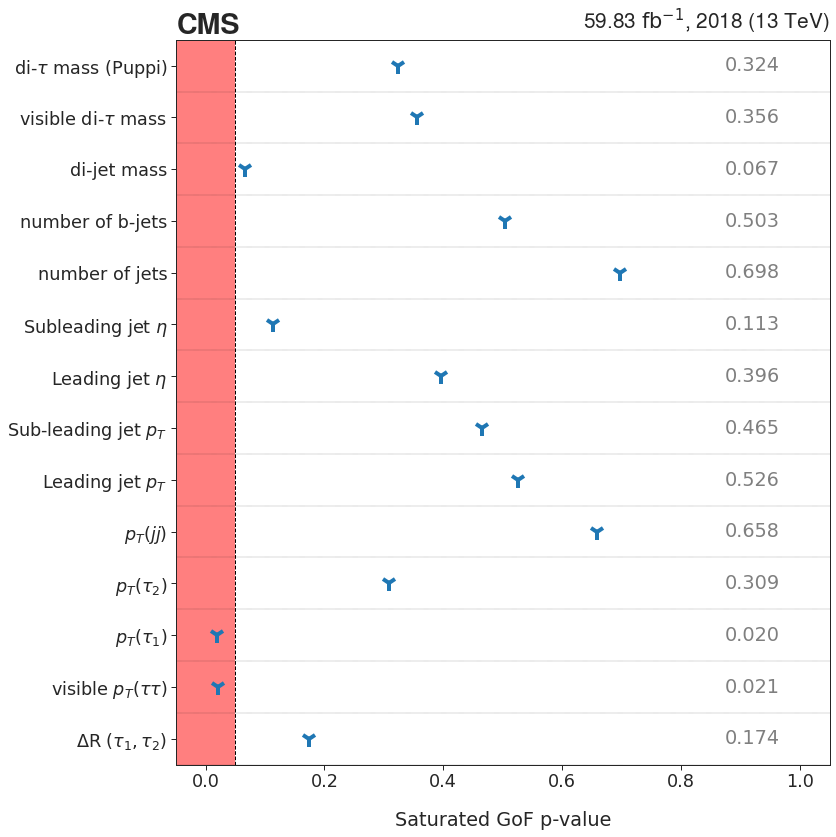

In [4]:
path = "output/gof/2022_09_v2-gof_test_v4"
variables = "deltaR_ditaupair,pt_vis,pt_1,pt_2,pt_dijet,jpt_1,jpt_2,jeta_1,jeta_2,njets,nbtag,mjj,m_vis,m_fastmtt".split(",")
missing_1d, results_1d = search_results_1d(path, "mt", "2018", variables)
for variable in missing_1d:
    print("{} {} {}".format("2018", "mt", variable))

plot_1d(variables, results_1d, "{}/{}_{}_gof_1d".format(path, "2018", "mt"))

Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_deltaR_ditaupair/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_pt_vis/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_pt_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_pt_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_pt_dijet/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_jpt_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_jpt_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_jeta_1/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_jeta_2/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_njets/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_nbtag/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_mjj/gof.json
Searching for output/gof/2022_09_v2-gof_test_mc_v4/2018_mt_m_vis/gof.json
Searching for output/gof/

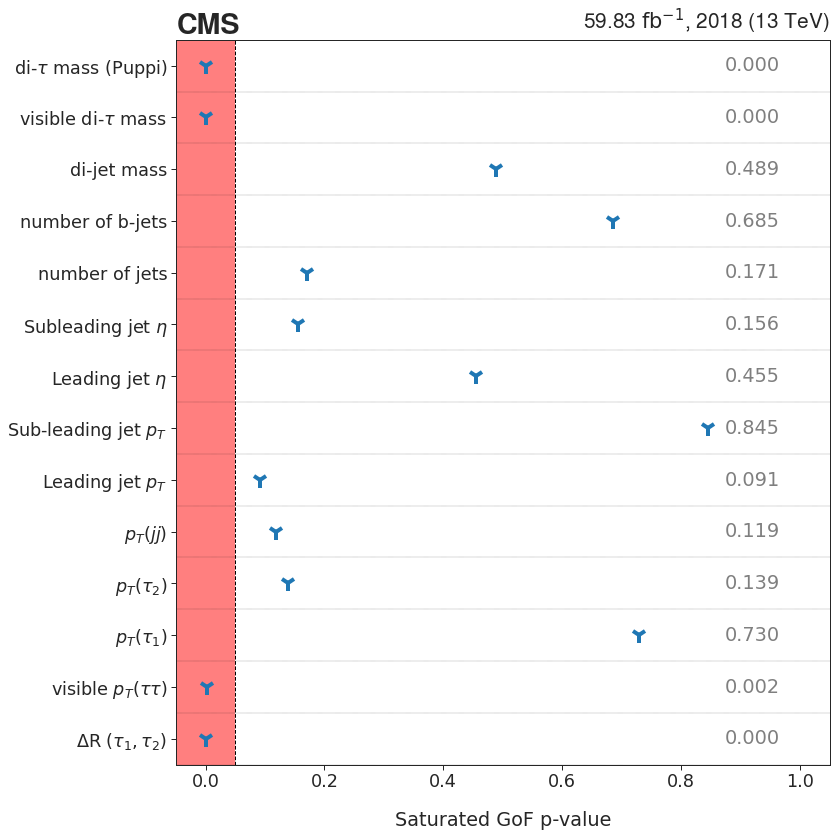

In [5]:
path = "output/gof/2022_09_v2-gof_test_mc_v4"
missing_1d, results_1d = search_results_1d(path, "mt", "2018", variables)
for variable in missing_1d:
    print("{} {} {}".format("2018", "mt", variable))

plot_1d(variables, results_1d, "{}/{}_{}_gof_1d".format(path, "2018", "mt"))